In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# df = pd.read_csv('./semstamp_attacks/filtered_data.csv')
# df = pd.read_csv('semstamp_attacks/06_01_prompt_based_lotr_3.csv')
df = pd.read_csv('06_01_prompt_based_gpt.csv')

df.columns

Index(['step_num', 'current_text', 'mutated_text', 'current_text_len',
       'mutated_text_len', 'length_issue', 'quality_analysis',
       'quality_preserved', 'watermark_detected', 'watermark_score',
       'backtrack', 'timestamp'],
      dtype='object')

In [14]:
len(df)

25

In [15]:
len_filtered_df = df[df["length_issue"] == False]

len_filtered_df["quality_analysis"][1]



'{\'original_analysis\': \'### Analysis and Recommendation:\\n\\nBoth Response A and Response B are very similar in content and structure. They both effectively discuss the role of power in the Lord of the Rings series, mentioning key aspects such as the One Ring\\\'s corrupting influence and the contrasting benevolent power of the free peoples.\\n\\nHowever, Response A has slightly better coherence and flow due to the use of transitional phrases like "Conversely" to connect ideas. Response A also introduces Boromir\\\'s tragic fallibility to provide a deeper analysis of the corrupting influence of power.\\n\\nIn terms of grammar and accuracy, both responses are equally strong with no noticeable errors.\\n\\nAlthough Response B is well-written, Response A offers a bit more depth and insight into the theme of power by including additional details and transitions. Therefore, **I recommend Response A** as the better choice for its nuanced analysis and enhanced coherence.\', \'original_ans

In [16]:
len(len_filtered_df)

21

In [17]:
import pandas as pd
import ast
from collections import Counter

def parse_and_aggregate_quality_analysis(data):
    # Filter rows where 'length_issue' is False
    filtered_data = data[data['length_issue'] == False]

    # Convert the quality_analysis column from string to dictionary
    quality_analysis_dicts = filtered_data['quality_analysis'].apply(ast.literal_eval)

    # Initialize counters for original and follow-up analyses
    original_analysis_counter = Counter()
    followup_analysis_counter = Counter()

    for analysis in quality_analysis_dicts:
        # Extract original and followup analyses
        original_answer = analysis.get('original_answer', '')
        followup_answer = analysis.get('followup_answer', '')

        # Update the counters
        original_analysis_counter[original_answer] += 1
        if followup_answer:
            followup_analysis_counter[followup_answer] += 1

    # Convert counters to DataFrames for better readability
    original_analysis_agg = pd.DataFrame(original_analysis_counter.items(), columns=['Analysis', 'Count'])
    followup_analysis_agg = pd.DataFrame(followup_analysis_counter.items(), columns=['Analysis', 'Count'])

    return original_analysis_agg, followup_analysis_agg

# Example usage with the provided data
original_analysis_agg, followup_analysis_agg = parse_and_aggregate_quality_analysis(len_filtered_df)



In [18]:
original_analysis_agg

,Analysis,Count
0,B,5
1,A,8
2,Equal,8


In [19]:
followup_analysis_agg

,Analysis,Count
0,A,9
1,Equal,11
2,B,1


In [20]:
quality_preserved_df = df[df['quality_preserved'] == True]

In [21]:
len(quality_preserved_df)

13

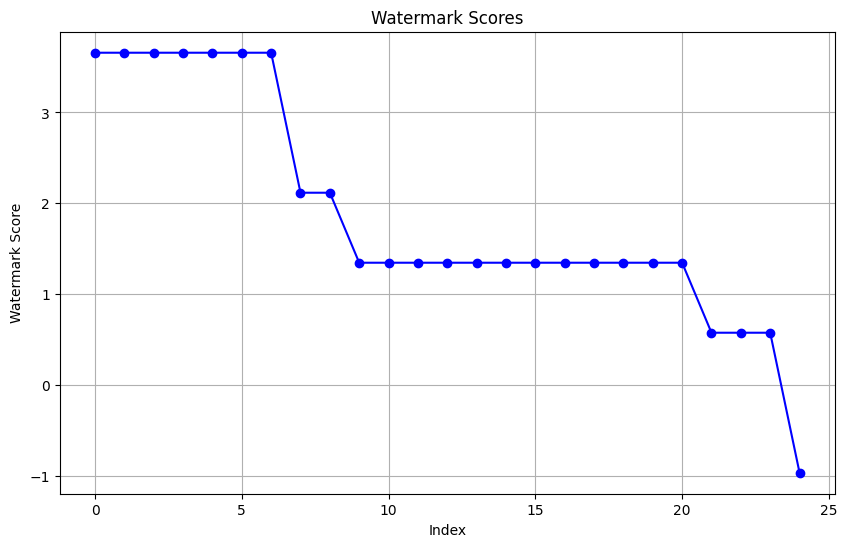

In [22]:

# Plotting the watermark_scores
plt.figure(figsize=(10, 6))
plt.plot(df['watermark_score'], marker='o', linestyle='-', color='b')
plt.title('Watermark Scores')
plt.xlabel('Index')
plt.ylabel('Watermark Score')
plt.grid(True)
plt.show()

In [26]:
df['mutated_text'].iloc[0]

"In J.R.R. Tolkien's esteemed Lord of the Rings series, power is a pervasive and profound theme that underscores the narrative's exploration of morality, toils, and triumphs. The struggle for power is a dominant force that drives the plot forward, propelling characters towards their destinies. The primary embodiment of power in the series is, undoubtedly, the One Ring. Crafted by the Dark Lord Sauron, this cursed artifact embodies the pinnacle of dark power, exerting a corrupting influence on all who touch it. The Ring's insidious influence seduces even the strongest of wills, exemplified by Boromir's tragic fallibility. As the quest to destroy the Ring unfolds, the pernicious nature of power becomes increasingly apparent, its corrosive effects seeping into the very fabric of Middle-earth's social hierarchy. Conversely, the free peoples of Middle-earth – including the Elves, Dwarves, and Humans – exemplify an alternative form of power: one rooted in wisdom, courage, and fellowship. Thi